In [138]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import metrics

## Classification Tree

In [116]:
carseats_df = pd.read_csv('Carseats.csv')
carseats_df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No


In [117]:
carseats_df["High"] = carseats_df["Sales"].apply(lambda x: "No" if x <= 8 else "Yes")
carseats_df["High"]

0      Yes
1      Yes
2      Yes
3       No
4       No
      ... 
395    Yes
396     No
397     No
398     No
399    Yes
Name: High, Length: 400, dtype: object

In [118]:
### drop_first=True 可以变成一列
# y = pd.get_dummies(carseats_df["High"], drop_first=True)
y = carseats_df["High"]
X = pd.concat([carseats_df.drop(labels = ["High", "Sales"], axis = 1), pd.get_dummies(carseats_df[["ShelveLoc", "Urban", "US"]])], axis = 1)
X = X.drop(labels = ["ShelveLoc", "Urban", "US"], axis = 1)

In [119]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array(['No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No'],
      dtype=object)

In [121]:
print(classification_report(y_test, predictions))
print("Accuarcy is:", str(round(accuracy_score(y_test, predictions),4)*100)+"%")

              precision    recall  f1-score   support

          No       0.74      0.75      0.74        71
         Yes       0.62      0.61      0.62        49

    accuracy                           0.69       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.69      0.69      0.69       120

Accuarcy is: 69.17%


In [122]:
model.feature_importances_

array([0.18689404, 0.10291625, 0.1049735 , 0.04716914, 0.31955802,
       0.04710222, 0.00409896, 0.        , 0.1489663 , 0.02504092,
       0.        , 0.01328063, 0.        , 0.        ])

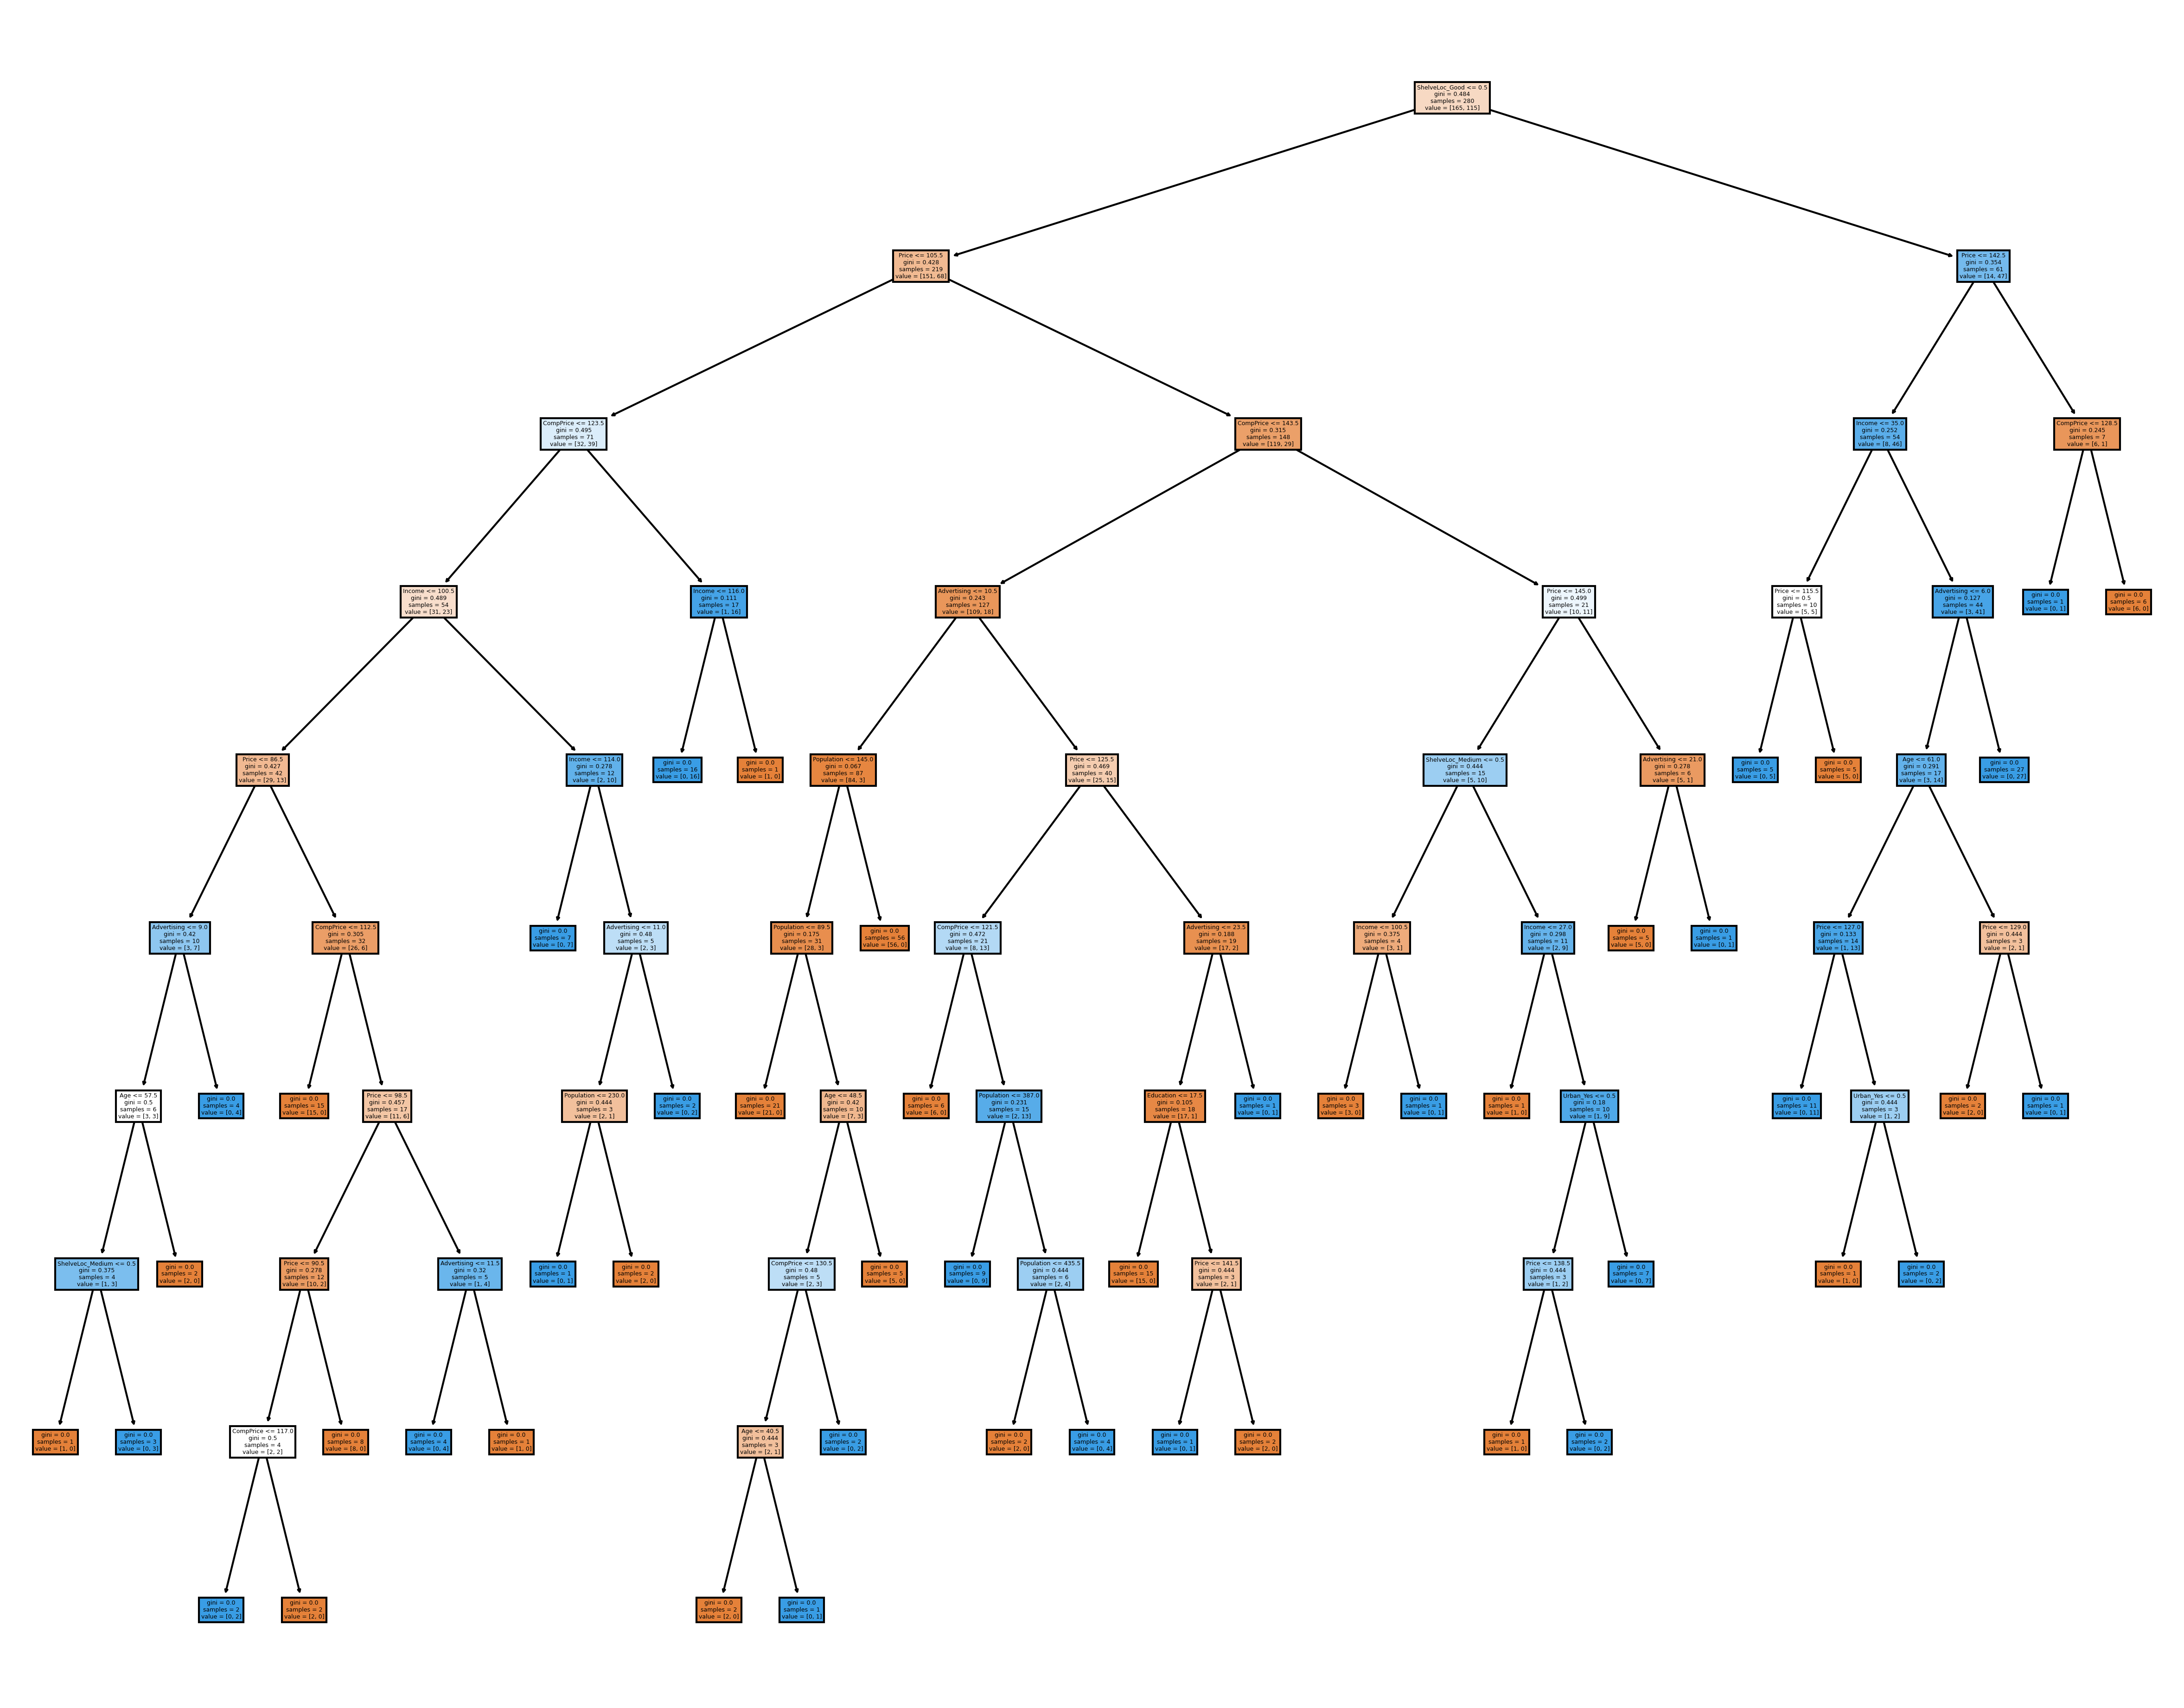

In [123]:
plt.figure(figsize=(20,16), dpi=300)
plot_tree(model, feature_names=X.columns, filled=True);

### Pruning

In [124]:
Model_pruning = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random')
Model_pruning.fit(X_train,y_train)
predictions = Model_pruning.predict(X_test)
predictions

array(['No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No'], dtype=object)

In [125]:
print(classification_report(y_test, predictions))
print("Accuarcy is:", str(round(accuracy_score(y_test, predictions),4)*100)+"%")

              precision    recall  f1-score   support

          No       0.81      0.83      0.82        71
         Yes       0.74      0.71      0.73        49

    accuracy                           0.78       120
   macro avg       0.78      0.77      0.77       120
weighted avg       0.78      0.78      0.78       120

Accuarcy is: 78.33%


## Regression Tree

In [128]:
boston_df = pd.read_csv("Boston.csv")
y = boston_df["medv"]
X = boston_df.drop(labels = "medv", axis = 1)

In [133]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([20.3, 15.6, 22.7, 33.1,  9.6, 31.5, 19.5, 24. , 23.7, 27. , 20.5,
       20.7, 19. , 24.1, 24.6,  7.2, 15. , 20.8, 17. , 15.4, 36.4, 28.4,
       50. , 19.7, 19.1, 16.1, 10.2, 18.9, 14.1, 30.7, 16.6, 19.6, 23.1,
       14.1, 11.9, 19.3, 14.1, 36.2, 30.5, 23.8, 17.3, 15.6, 28.4, 16.2,
       17.1, 17.8, 37.3, 29.9, 14. , 20.3, 28.7, 34.7, 19.1, 11.3, 30.5,
       11.3, 33.1, 50. , 14.1, 16.2, 11.9, 11.3, 11.7, 21.2, 22.7, 20.1,
       23.7, 22.9, 27.9, 22.4, 19.4, 13.6, 48.3, 16.2, 18.8, 17. , 16.2,
       36. , 35.2, 17.5, 22.6, 19.4, 20.1, 36.2, 17.8, 20.1, 11.7, 25.3,
       22.6,  7.2, 22.7, 15. , 24.1, 15. , 19.5, 23.2, 50. , 21.2, 14.3,
       25.2, 19.8, 19.6, 21.1, 10.5, 20.3, 27. , 19.1, 20.5, 14.9, 23.7,
       50. , 19.5, 43.1, 33.1, 24.7, 19.3, 28.7, 37.6, 12.3, 22.7, 50. ,
       16. , 24.5, 20.4, 21.6, 37.3, 14.4, 15.6, 22.7, 21.7, 18.4, 22.6,
       17.8, 20.1, 16.2, 24.6, 34.6, 24.5, 14.8, 13.8, 20.3, 15.6, 14.5,
       43.1, 28.1, 30.1, 36.4, 19.4, 50. , 22. , 20

In [139]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2.6486842105263158
Mean Squared Error: 13.891052631578951
Root Mean Squared Error: 3.7270702477386917
